# Module 2 Practice 1 - Performing a Survival Analysis
In this practice exercise, you will perform the steps of a survival analysis on a new dataset.

The dataset we will be using is another leukemia survival.  In this data, the groups are denoted by a test result.  There is no censored data in this dataset, all patients died from acute myelogenous leukaemia and were recorded during the study.  There is an independent variable `wbc` - white blood cell count.

Documentation is [here](../resources/leukaemia-wbc.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install lifelines
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter

     |████████████████████████████████| 358kB 3.1MB/s eta 0:00:01
     |████████████████████████████████| 61kB 12.8MB/s eta 0:00:01
     |████████████████████████████████| 829kB 24.7MB/s eta 0:00:01
     |████████████████████████████████| 81kB 23.3MB/s eta 0:00:01
  Created wheel for autograd: filename=autograd-1.3-cp37-none-any.whl size=47990 sha256=c9cc8d89ad2dca7663d5771da262e244f10cee25bf3d3462af5098475db2af1b
  Stored in directory: /home/dcphw2/.cache/pip/wheels/42/62/66/1121afe23ff96af4e452e0d15e68761e3f605952ee075ca99f
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-cp37-none-any.whl size=4034 sha256=b864e9f95b332d35cf3d46a2155f4c4ce8b7faca3a6615211bd48921a20fe226
  Stored in directory: /home/dcphw2/.cache/pip/wheels/dc/68/dc/91321c55fba449755524481854f5be70d41912b8f886f908bb
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491057 sha256=a76b1cd1d88c99c09b98c8b808d04da66e8e1d2f745f00e9e586622d11de1396
  Stored in directory: /home/dcphw2

In [2]:
data = pd.read_csv('../resources/leukaemia-wbc.csv', index_col=0)

display(data)

,wbc,ag,time
1,2300,present,65
2,750,present,156
3,4300,present,100
4,2600,present,134
5,6000,present,16
6,10500,present,108
7,10000,present,121
8,17000,present,4
9,5400,present,39
10,7000,present,143


## Create a column to represent the event
This will be a constant value since every patient died, but is needed for the `lifelines` methods.

In [3]:
# your code here

data['death'] = 1

## Create a numeric category for the two groups
Create a numeric column that can be used in regression to represent the two groups in the data

In [4]:
# your code here

data['group'] = data['ag'].apply(lambda x: 1 if x == 'present' else 0)

## Calculate the event tables for each group

In [5]:
# your code here

# First we will break the data into two views for convenience
data_present = data[data['ag'] == 'present']
data_absent = data[data['ag'] == 'absent']

# create two Kaplan-Meier fitters
kmf_present = KaplanMeierFitter()
kmf_absent = KaplanMeierFitter()

kmf_present.fit(durations = data_present['time'], event_observed = data_present['death'], label='present')
kmf_absent.fit(durations = data_absent['time'], event_observed = data_absent['death'], label='absent')

event_table_present = kmf_present.event_table
event_table_absent = kmf_absent.event_table

## Add the cumulative survival probability to each event table and print them

In [6]:
# your code here

event_table_present['cumulative_S'] = kmf_present.survival_function_
event_table_absent['cumulative_S'] = kmf_absent.survival_function_

display(event_table_present)
display(event_table_absent)# your code here

,removed,observed,censored,entrance,at_risk,cumulative_S
event_at,,,,,,
0.0,0,0,0,17,17,1.000000
1.0,2,2,0,0,17,0.882353
4.0,1,1,0,0,15,0.823529
5.0,1,1,0,0,14,0.764706
16.0,1,1,0,0,13,0.705882
22.0,1,1,0,0,12,0.647059
26.0,1,1,0,0,11,0.588235
39.0,1,1,0,0,10,0.529412
56.0,1,1,0,0,9,0.470588


,removed,observed,censored,entrance,at_risk,cumulative_S
event_at,,,,,,
0.0,0,0,0,16,16,1.0000
2.0,1,1,0,0,16,0.9375
3.0,3,3,0,0,15,0.7500
4.0,3,3,0,0,12,0.5625
7.0,1,1,0,0,9,0.5000
8.0,1,1,0,0,8,0.4375
16.0,1,1,0,0,7,0.3750
17.0,1,1,0,0,6,0.3125
22.0,1,1,0,0,5,0.2500


## Plot the Kaplan-Meier curve for each group

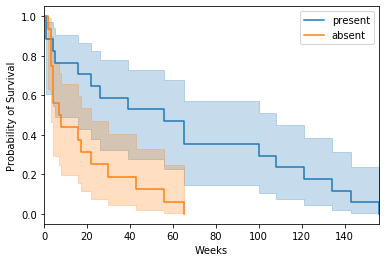

In [7]:
# your code here

kmf_present.plot()
kmf_absent.plot()

_ = plt.xlabel('Weeks')
_ = plt.ylabel('Probability of Survival')

## Test the hypothesis that the survival distribution is different for the two groups

In [8]:
# your code here

results = logrank_test(data_present['time'], data_absent['time'], event_observed_A=data_present['death'], event_observed_B=data_absent['death'])

results.print_summary()
print(results.p_value)

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
           8.45 <0.005      8.10

0.003653062510190359


## Interpret the results using appropriate language

Your interpretation here

## Find the hazard ratio between the two groups

In [9]:
# your code here

cph = CoxPHFitter()
cph.fit(data[['time', 'death', 'group']], duration_col='time', event_col='death')

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 33 total observations, 0 right-censored observations>
             duration col = 'time'
                event col = 'death'
      baseline estimation = breslow
   number of observations = 33
number of events observed = 33
   partial log-likelihood = -80.92
         time fit was run = 2022-01-25 20:54:36 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
group      -1.18       0.31       0.42            -2.00            -0.36                 0.14                 0.70

              z      p   -log2(p)
covariate                        
group     -2.83 <0.005       7.74
---
Concordance = 0.62
Partial AIC = 163.85
log-likelihood ratio test = 8.26 on 1 df
-log2(p) of ll-ratio test = 7.95

## Interpret the hazard ratio in written form

Your interpretation here

Being in the group with a test result of absent (group = 0) increases the hazard of death by 0.31 times as compared to subjects with a test result of present (group = 1).